In [1]:
!pip install tensorflow
!pip install tensorflow==2.4.0
!pip install imutils
import numpy as np
import cv2
import os
import tensorflow as tf
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import LearningRateScheduler, ModelCheckpoint
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sn
import matplotlib.pyplot as plt
import pandas as pd
import imutils
from imutils.contours import sort_contours
from tensorflow.keras.layers import Input, Conv2D, Activation, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization


ERROR: Could not find a version that satisfies the requirement tensorflow==2.4.0 (from versions: 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.12.1, 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0, 2.13.1, 2.14.0rc0, 2.14.0rc1, 2.14.0, 2.14.1, 2.15.0rc0, 2.15.0rc1, 2.15.0, 2.15.1, 2.16.0rc0, 2.16.1)
ERROR: No matching distribution found for tensorflow==2.4.0


In [37]:
import urllib.request

url = "https://cainvas-static.s3.amazonaws.com/media/user_data/Yuvnish17/data.zip"
filename = "data.zip" 

urllib.request.urlretrieve(url, filename)

('data.zip', <http.client.HTTPMessage at 0x1f4c3aec710>)

In [38]:
import zipfile

with zipfile.ZipFile('data.zip', 'r') as zip_ref:
    zip_ref.extractall('dataCaption') 


In [2]:
x = []
y = []
datadir = 'dataaa'
for folder in os.listdir(datadir):
    path = os.path.join(datadir, folder)
    for images in os.listdir(path):
        img = cv2.imread(os.path.join(path, images))
        x.append(img)
        y.append(folder)
        
print(len(x))
print(len(y))
print(f'labels : {list(set(y))}')

4111
4111
labels : ['fraction', 'non-fraction']


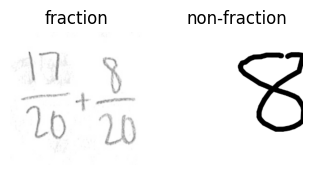

In [3]:
import matplotlib.pyplot as plt
figure = plt.figure(figsize=(10, 10))
j = 0
for i in list(set(y)):
    idx = y.index(i)
    img = x[idx]
    img = cv2.resize(img, (256, 256))
    figure.add_subplot(5, 5, j+1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(i)
    j += 1

In [4]:
X = []
for i in range(len(x)):
#     print(i)
    img = x[i]
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    threshold_image = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY_INV|cv2.THRESH_OTSU)[1]
    threshold_image = cv2.resize(threshold_image, (56, 56))
    X.append(threshold_image)
print(len(X))


4111


In [5]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
print(len(y))

4111


In [6]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)

from sklearn.model_selection import train_test_split
import numpy as np
from tensorflow.keras.utils import to_categorical

# Assuming you have input data X and labels y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


# Convert labels to categorical if needed
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

X_train = np.array(X_train)
X_val = np.array(X_val)
X_test = np.array(X_test)

X_train = np.expand_dims(X_train, axis=-1)
X_val = np.expand_dims(X_val, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

X_train = X_train / 255.0
X_val = X_val / 255.0
X_test = X_test / 255.0

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)


(2630, 56, 56, 1)
(658, 56, 56, 1)
(823, 56, 56, 1)
(2630, 2)
(658, 2)
(823, 2)


In [7]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential

In [8]:
#**Improved Model**

In [16]:
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Conv2D, Activation, MaxPool2D, Flatten, Dropout, Dense, Input, BatchNormalization
)
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

def improved_math_symbol_and_digits_recognition(input_shape=(56, 56, 1)):
    regularizer = regularizers.l2(0.01)
    model = Sequential()
    model.add(Input(shape=input_shape))
    
    # First Convolution Block
    model.add(Conv2D(32, (3, 3), strides=(1, 1), padding='same', 
                     kernel_initializer=glorot_uniform(seed=0), 
                     name='conv1', activity_regularizer=regularizer))
    model.add(BatchNormalization())
    model.add(Activation('relu', name='act1'))
    model.add(MaxPool2D((2, 2), strides=(2, 2)))
    
    # Second Convolution Block
    model.add(Conv2D(32, (3, 3), strides=(1, 1), padding='same', 
                     kernel_initializer=glorot_uniform(seed=0), 
                     name='conv2', activity_regularizer=regularizer))
    model.add(BatchNormalization())
    model.add(Activation('relu', name='act2'))
    model.add(MaxPool2D((2, 2), strides=(2, 2)))
    
    # Third Convolution Block
    model.add(Conv2D(64, (3, 3), strides=(1, 1), padding='same', 
                     kernel_initializer=glorot_uniform(seed=0), 
                     name='conv3', activity_regularizer=regularizer))
    model.add(BatchNormalization())
    model.add(Activation('relu', name='act3'))
    model.add(MaxPool2D((2, 2), strides=(2, 2)))
    
    # Fully Connected Layers
    model.add(Flatten())
    model.add(Dropout(0.5))
    model.add(Dense(120, activation='relu', kernel_initializer=glorot_uniform(seed=0), name='fc1'))
    model.add(Dense(84, activation='relu', kernel_initializer=glorot_uniform(seed=0), name='fc2'))
    model.add(Dense(2, activation='softmax', kernel_initializer=glorot_uniform(seed=0), name='fc3'))
    
    optimizer = Adam(learning_rate=0.001)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    
    return model

# Creating the model and displaying the summary
model = improved_math_symbol_and_digits_recognition(input_shape=(56, 56, 1))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1 (Conv2D)              (None, 56, 56, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 56, 56, 32)       128       
 ormalization)                                                   
                                                                 
 act1 (Activation)           (None, 56, 56, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 28, 28, 32)       0         
 )                                                               
                                                                 
 conv2 (Conv2D)              (None, 28, 28, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 28, 28, 32)       1

In [17]:
model = improved_math_symbol_and_digits_recognition(input_shape=(56, 56, 1))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1 (Conv2D)              (None, 56, 56, 32)        320       
                                                                 
 batch_normalization_3 (Batc  (None, 56, 56, 32)       128       
 hNormalization)                                                 
                                                                 
 act1 (Activation)           (None, 56, 56, 32)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 28, 28, 32)       0         
 2D)                                                             
                                                                 
 conv2 (Conv2D)              (None, 28, 28, 32)        9248      
                                                                 
 batch_normalization_4 (Batc  (None, 28, 28, 32)      

In [18]:
def step_decay(epoch):
    initial_learning_rate = 0.001
    dropEvery = 10
    factor = 0.5
    lr = initial_learning_rate*(factor**np.floor((1 + epoch)/dropEvery))
    return float(lr)

checkpoint = ModelCheckpoint('improved_math_symbol_and_digits_recognition.h5', 
                             monitor='val_loss', save_best_only=True, 
                             verbose=1, mode='min')

callbacks = [checkpoint, LearningRateScheduler(step_decay)]

In [19]:
print(X_train.shape)
print(X_test.shape)

(2630, 56, 56, 1)
(823, 56, 56, 1)


In [20]:
aug = ImageDataGenerator(zoom_range=0.1,
#                          rotation_range=5,
                         width_shift_range=0.05,
                         height_shift_range=0.05)
hist = model.fit(aug.flow(X_train, y_train, batch_size=32), batch_size=32, epochs=50, validation_data=(X_test, y_test))
#hist = model.fit(X_train, y_train, batch_size=32, epochs=100, validation_data=(X_test, y_test), callbacks=callbacks)

Epoch 1/50
83/83 [==============================] - 8s 63ms/step - loss: 37.2299 - accuracy: 0.8601 - val_loss: 4.5383 - val_accuracy: 0.4058
Epoch 2/50
83/83 [==============================] - 5s 58ms/step - loss: 9.9281 - accuracy: 0.9452 - val_loss: 2.5958 - val_accuracy: 0.4058
Epoch 3/50
83/83 [==============================] - 5s 59ms/step - loss: 4.8805 - accuracy: 0.9483 - val_loss: 1.6532 - val_accuracy: 0.4070
Epoch 4/50
83/83 [==============================] - 5s 62ms/step - loss: 2.9000 - accuracy: 0.9544 - val_loss: 1.1182 - val_accuracy: 0.9721
Epoch 5/50
83/83 [==============================] - 5s 59ms/step - loss: 2.0931 - accuracy: 0.9426 - val_loss: 0.9205 - val_accuracy: 0.7084
Epoch 6/50
83/83 [==============================] - 5s 62ms/step - loss: 1.3075 - accuracy: 0.9513 - val_loss: 0.7416 - val_accuracy: 0.7473
Epoch 7/50
83/83 [==============================] - 5s 58ms/step - loss: 0.7479 - accuracy: 0.9707 - val_loss: 0.5054 - val_accuracy: 0.9405
Epoch 8/50
8

In [21]:
model.save('cnn_improved_model.h5')  # This saves everything in HDF5 format
model.save('cnn_improved_model')  # This saves everything in SavedModel format


INFO:tensorflow:Assets written to: cnn_improved_model\assets


INFO:tensorflow:Assets written to: cnn_improved_model\assets


In [22]:
ypred = model.predict(X_test)
ypred = np.argmax(ypred, axis=1)
Y_test_hat = np.argmax(y_test, axis=1)
print(classification_report(Y_test_hat, ypred))


26/26 [==============================] - 1s 15ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       489
           1       1.00      0.99      1.00       334

    accuracy                           1.00       823
   macro avg       1.00      1.00      1.00       823
weighted avg       1.00      1.00      1.00       823



1/1 [==============================] - 0s 20ms/step


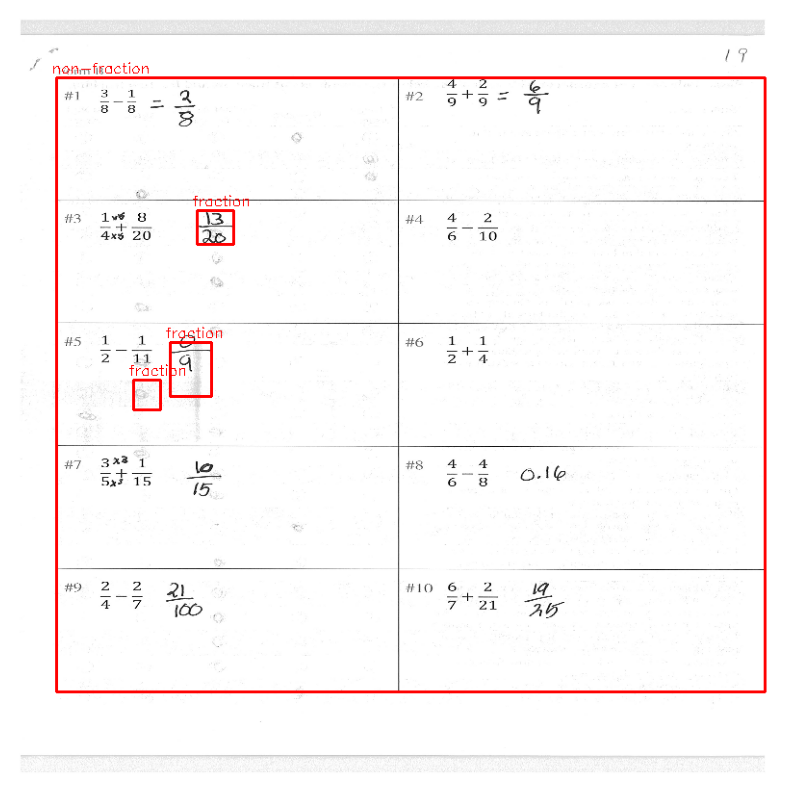

In [40]:
import cv2
import numpy as np
import imutils
import matplotlib.pyplot as plt

# Assuming 'model' is already trained and available
def test_pipeline(image_path):
    # Read and preprocess the image
    img = cv2.imread(image_path)
    img = cv2.resize(img, (800, 800))
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Apply edge detection
    edged = cv2.Canny(img_gray, 30, 150)
    
    # Find and sort contours
    contours = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours = imutils.grab_contours(contours)
    contours = imutils.contours.sort_contours(contours, method="left-to-right")[0]
    
    labels = ['fraction', 'non-fraction']
    
    for c in contours:
        (x, y, w, h) = cv2.boundingRect(c)
        if 20 <= w and 30 <= h:  # Adjust these thresholds as needed
            roi = img_gray[y:y+h, x:x+w]
            thresh = cv2.threshold(roi, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
            
            # Resize and pad the ROI to fit the model input size
            (th, tw) = thresh.shape
            if tw > th:
                thresh = imutils.resize(thresh, width=56)
            else:
                thresh = imutils.resize(thresh, height=56)
            
            (th, tw) = thresh.shape
            dx = int(max(0, 56 - tw) / 2.0)
            dy = int(max(0, 56 - th) / 2.0)
            padded = cv2.copyMakeBorder(thresh, top=dy, bottom=dy, left=dx, right=dx, borderType=cv2.BORDER_CONSTANT, value=(0, 0, 0))
            padded = cv2.resize(padded, (56, 56))
            
            # Normalize and prepare the image for prediction
            padded = np.array(padded) / 255.0
            padded = np.expand_dims(padded, axis=0)
            padded = np.expand_dims(padded, axis=-1)
            
            # Predict the class
            pred = model.predict(padded)
            pred = np.argmax(pred, axis=1)
            label = labels[pred[0]]
            
            # Draw the bounding box and label on the original image
            cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 2)
            cv2.putText(img, label, (x-5, y-5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1)
    
    # Display the image
    figure = plt.figure(figsize=(10, 10))
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.show()

# Example usage:
test_pipeline("g.JPG")


1/1 [==============================] - 0s 33ms/step


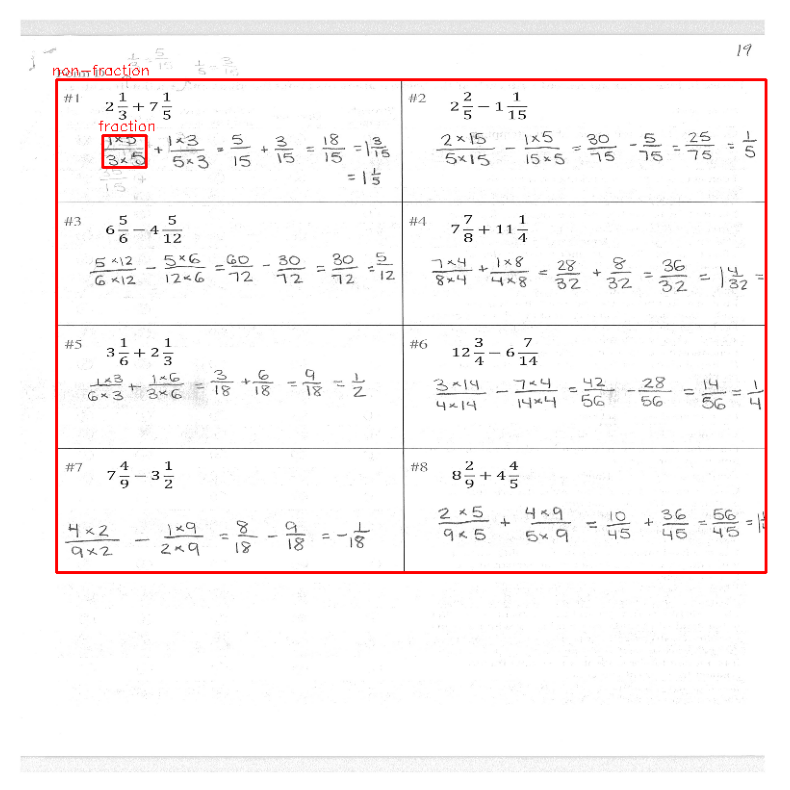

In [42]:
test_pipeline("p.JPG")